## Modelo de Controle de Qualidade

#### Modelo de classificação de imagens que tem como objetivo classificar fotos de peças fundidas entre sem defeito e defeituosa. Os defeitos podem ser buracos, bolhas, rebarbas, dimensões incorretas, trincas e etc. O banco de imagens possui 7348 imagens com tamanho de 300*300 pixels em tons de cinza. Elas foram divididas entre treino e teste com 6633 e 715 imagens respectivamente. Para realizar a classificação, foi utilizada uma rede neural convolucional.

In [1]:
from matplotlib import pyplot as plt

In [2]:
import numpy as np

In [3]:
from PIL import Image

In [4]:
import os

In [5]:
import cv2

In [6]:
from google.colab.patches import cv2_imshow

In [7]:
import random

In [8]:
import keras

In [9]:
from keras import models
from keras import layers

In [10]:
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

Estabelecimento da conexão com o Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
pwd

'/content'

Exibição de um exemplo de imagem da peça defeituosa.

In [12]:
im = Image.open('/content/drive/MyDrive/Data/train/def_front/cast_def_0_0.jpeg')

In [13]:
im.size

(300, 300)

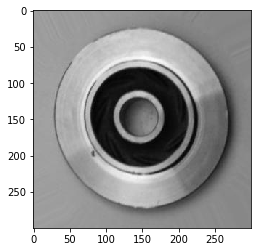

In [14]:
plt.imshow(im, cmap='gray', interpolation='none')

###Extração dos pixels das imagens.

As imagens estão divididas em quatro pastas: treino defeituosa com 3758 imagens, treino sem defeito com 2875 imagens, teste defeituosa com 453 imagens e teste sem defeito com 262 imagens.

In [15]:
list_tr_df = os.listdir('/content/drive/MyDrive/Data/train/def_front')
number_files_tr_df = len(list_tr_df)
print(number_files_tr_df)

3758


In [16]:
list_tr_ok = os.listdir('/content/drive/MyDrive/Data/train/ok_front')
number_files_tr_ok = len(list_tr_ok)
print(number_files_tr_ok)

2875


Redimensionamento das imagens(64*64 pixels) da pasta treino defeituosa, extração dos pixels e criação dos tensores.

In [17]:
train_def_list=[]
for subdirs, dirs, files in os.walk('/content/drive/MyDrive/Data/train/def_front'):
  for filename in files:
    filepath = subdirs+os.sep+filename
    i=Image.open(filepath)
    ii=i.resize((64,64))
    u=np.array((ii).getdata())
    for k in range(len(u)):
      for l in range(len(u[k])):
        x=np.unique(u[k])
      train_def_list.append(x)
train_def_array=np.array(train_def_list)
train_def_array=train_def_array.reshape(number_files_tr_df,64,64,1)

In [18]:
train_def_array.shape

(3758, 64, 64, 1)


Redimensionamento das imagens(64*64 pixels) da pasta treino sem defeito, extração dos pixels e criação dos tensores.


In [19]:
train_ok_list=[]
for subdirs, dirs, files in os.walk('/content/drive/MyDrive/Data/train/ok_front'):
  for filename in files:
    filepath = subdirs+os.sep+filename
    i=Image.open(filepath)
    ii=i.resize((64,64))
    u=np.array((ii).getdata())
    for k in range(len(u)):
      for l in range(len(u[k])):
        x=np.unique(u[k])
      train_ok_list.append(x)
train_ok_array=np.array(train_ok_list)
train_ok_array=train_ok_array.reshape(number_files_tr_ok,64,64,1)

In [20]:
train_ok_array.shape

(2875, 64, 64, 1)

Criação dos arrays com os labels das imagens de treino.
### 1 para defeituosa
### 0 para sem defeito

In [21]:
train_def_labels=np.ones(number_files_tr_df,dtype=np.int64)

In [22]:
train_def_labels.shape

(3758,)

In [23]:
train_ok_labels=np.zeros(number_files_tr_ok,dtype=np.int64)

In [24]:
train_ok_labels.shape

(2875,)

Junção e mistura das imagens de treino defeituosas e sem defeitos.

In [25]:
train_def_l=train_def_array.tolist()
train_ok_l=train_ok_array.tolist()
train_l=train_def_l+train_ok_l
random.seed(1234)
random.shuffle(train_l)
train_array=np.array(train_l)
print(train_array.shape)

(6633, 64, 64, 1)


Junção e mistura dos labels das imagens de treino defeituosas e sem defeitos.

In [26]:
train_def_labels_l=train_def_labels.tolist()
train_ok_labels_l=train_ok_labels.tolist()
train_labels_l=train_def_labels_l+train_ok_labels_l
random.seed(1234)
random.shuffle(train_labels_l)
train_labels_array=np.array(train_labels_l)
print(train_labels_array.shape)

(6633,)


Exibição de uma imagem do tensor de treino(conferência)

LABEL:1


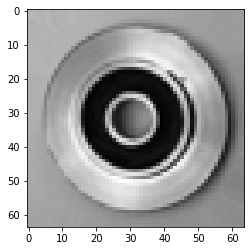

In [27]:
lb=0
train_array_d=train_array.reshape(6633,64,64)
plt.imshow(train_array_d[lb], cmap='gray', interpolation='none')
print('LABEL:'+str(train_labels_array[lb]))

In [28]:
list_ts_df = os.listdir('/content/drive/MyDrive/Data/test/def_front')
number_files_ts_df = len(list_ts_df)
print(number_files_ts_df)

453


In [29]:
list_ts_ok = os.listdir('/content/drive/MyDrive/Data/test/ok_front')
number_files_ts_ok = len(list_ts_ok)
print(number_files_ts_ok)

262


Redimensionamento das imagens(64*64 pixels) da pasta teste sem defeito, extração dos pixels e criação dos tensores.

In [30]:
test_def_list=[]
for subdirs, dirs, files in os.walk('/content/drive/MyDrive/Data/test/def_front'):
  for filename in files:
    filepath = subdirs+os.sep+filename
    i=Image.open(filepath)
    ii=i.resize((64,64))
    u=np.array((ii).getdata())
    for k in range(len(u)):
      for l in range(len(u[k])):
        x=np.unique(u[k])
      test_def_list.append(x)
test_def_array=np.array(test_def_list)
test_def_array=test_def_array.reshape(number_files_ts_df,64,64,1)

In [31]:
test_def_array.shape

(453, 64, 64, 1)

Redimensionamento das imagens(64*64 pixels) da pasta teste sem defeito, extração dos pixels e criação dos tensores.

In [32]:
test_ok_list=[]
for subdirs, dirs, files in os.walk('/content/drive/MyDrive/Data/test/ok_front'):
  for filename in files:
    filepath = subdirs+os.sep+filename
    i=Image.open(filepath)
    ii=i.resize((64,64))
    u=np.array((ii).getdata())
    for k in range(len(u)):
      for l in range(len(u[k])):
        x=np.unique(u[k])
      test_ok_list.append(x)
test_ok_array=np.array(test_ok_list)
test_ok_array=test_ok_array.reshape(number_files_ts_ok,64,64,1)

In [33]:
test_ok_array.shape

(262, 64, 64, 1)

Criação dos arrays com os labels das imagens de teste.

1 para defeituosa

0 para sem defeito

In [34]:
test_def_labels=np.ones(number_files_ts_df,dtype=np.int64)

In [35]:
test_ok_labels=np.zeros(number_files_ts_ok,dtype=np.int64)

Junção e mistura das imagens de teste defeituosas e sem defeitos.

In [36]:
test_def_l=test_def_array.tolist()
test_ok_l=test_ok_array.tolist()
test_l=test_def_l+test_ok_l
random.seed(1234)
random.shuffle(test_l)
test_array=np.array(test_l)
print(test_array.shape)

(715, 64, 64, 1)


Junção e mistura dos labels das imagens de teste defeituosas e sem defeitos.

In [37]:
test_def_labels_l=test_def_labels.tolist()
test_ok_labels_l=test_ok_labels.tolist()
test_labels_l=test_def_labels_l+test_ok_labels_l
random.seed(1234)
random.shuffle(test_labels_l)
test_labels_array=np.array(test_labels_l)
print(test_labels_array.shape)

(715,)


Exibição de uma imagem do tensor de teste(conferência)

LABEL:1


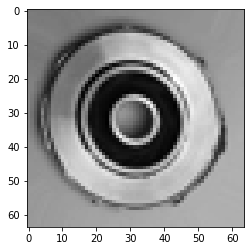

In [38]:
lb_t=0
test_array_d=test_array.reshape(715,64,64)
plt.imshow(test_array_d[lb_t], cmap='gray', interpolation='none')
print('LABEL:'+str(test_labels_array[lb_t]))

In [39]:
train_labels_array

array([1, 0, 0, ..., 1, 1, 0])

In [ ]:
from numpy import asarray
from numpy import save
save('/content/drive/MyDrive/Data/train/train.npy', train_array)
save('/content/drive/MyDrive/Data/test/test.npy', test_array)

In [23]:
from numpy import load
train_array_l=np.load('/content/drive/MyDrive/Data/train/train.npy')
test_array_l=np.load('/content/drive/MyDrive/Data/test/test.npy')

Construção do modelo de rede neural convolucional

In [60]:
network = models.Sequential()

In [61]:
network.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=(64,64,1)))
network.add(Conv2D(64, kernel_size=3, activation='relu'))
network.add(MaxPooling2D(pool_size=(2,2)))
network.add(Conv2D(128, kernel_size=3, activation='relu'))
network.add(MaxPooling2D(pool_size=(2,2)))
network.add(Flatten())
network.add(Dense(512))
network.add(Activation('relu'))
network.add(Dense(1, activation='sigmoid'))

In [62]:
network.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Normalização dos valores dos pixels

In [44]:
train_array_2 = train_array / 255
test_array_2= test_array / 255

Treino do modelo

In [63]:
history = network.fit(train_array_2, train_labels_array, epochs=20)

Epoch 1/20
208/208 [==============================] - 121s 574ms/step - loss: 0.6187 - accuracy: 0.6669
Epoch 2/20
208/208 [==============================] - 120s 577ms/step - loss: 0.2261 - accuracy: 0.9115
Epoch 3/20
208/208 [==============================] - 120s 576ms/step - loss: 0.1277 - accuracy: 0.9537
Epoch 4/20
208/208 [==============================] - 120s 578ms/step - loss: 0.0667 - accuracy: 0.9796
Epoch 5/20
208/208 [==============================] - 120s 575ms/step - loss: 0.0375 - accuracy: 0.9884
Epoch 6/20
208/208 [==============================] - 120s 577ms/step - loss: 0.0184 - accuracy: 0.9958
Epoch 7/20
208/208 [==============================] - 120s 575ms/step - loss: 0.0135 - accuracy: 0.9971
Epoch 8/20
208/208 [==============================] - 120s 576ms/step - loss: 0.0500 - accuracy: 0.9833
Epoch 9/20
208/208 [==============================] - 119s 574ms/step - loss: 0.0106 - accuracy: 0.9963
Epoch 10/20
208/208 [==============================] - 119s 574m

Verificação da acurácia

In [64]:
test_loss, test_acc = network.evaluate(test_array_2, test_labels_array)

23/23 [==============================] - 3s 120ms/step - loss: 0.0208 - accuracy: 0.9944


In [70]:
test_loss, test_acc

(0.02079261653125286, 0.9944055676460266)

In [53]:
print(network.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
module_wrapper (ModuleWrappe (None, 62, 62, 32)        320       
_________________________________________________________________
module_wrapper_1 (ModuleWrap (None, 60, 60, 64)        18496     
_________________________________________________________________
module_wrapper_2 (ModuleWrap (None, 30, 30, 64)        0         
_________________________________________________________________
module_wrapper_3 (ModuleWrap (None, 28, 28, 128)       73856     
_________________________________________________________________
module_wrapper_4 (ModuleWrap (None, 14, 14, 128)       0         
_________________________________________________________________
module_wrapper_5 (ModuleWrap (None, 25088)             0         
_________________________________________________________________
module_wrapper_6 (ModuleWrap (None, 512)               1

In [72]:
data_his = pd.DataFrame(history.history)

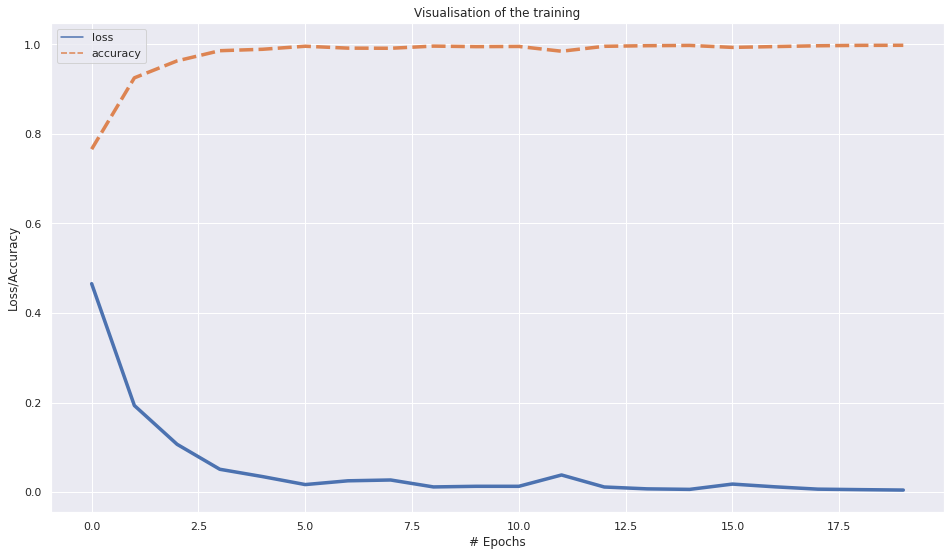

In [73]:
import seaborn as sns

plt.rcParams["figure.figsize"] = (16,9)
sns.set(style="darkgrid")

plt.title('Visualisation of the training')
plt.ylabel('Loss/Accuracy')
plt.xlabel('# Epochs')
sns.lineplot(data=data_his, linewidth=3.5)